In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Define constants
# Boltzmann constant in J/K
kb = 1.38064852e-23 
# Planck's constant in J*s
h = 6.62607004e-34
# Avogadro's number
NA = 6.0221409e23 
# Speed of light in m/s
c = 299792458
# hbar in J*s
twopi = 2*np.pi
hbar = h/twopi

**Problem 1c**
Calculate the ratio of translational partition functions for this reaction. Your
answer will be in units of volume, and should be multiplied by the concentration
of the standard state (1 M / L = 6.022×10 26 m–3
). Next, calculate the ratio of
rotational, vibrational, and electronic partition functions. Take the product of the
four ratios to obtain the equilibrium constant.

In [3]:
def f_trans(mass, T):
    """
    Calculate the translational partition function for a single molecule, 
    given the mass and temperature.
    
    Parameters
    ----------
    temp : float or np.array
        Temperature(s) in K
    
    mass : float
        Mass of the molecule in amu. 
        
    Returns
    -------
    float or np.array
        Value of the translational partition function at temperature(s) specified. 
    """
    # convert mass from amu to kg
    mass *= 1.6605e-27
    # calculate inverse thermal wavelength
    thermal_wavelength = np.sqrt(twopi*mass*kb*T)/h
    # calculate f_translational in units of volume
    f_trans_vol = thermal_wavelength**3
    # convert to units of concentration
    f_trans_conc = f_trans_vol # * 6.022e26 # HP: I commented this out and multiplied it to the final K_trans_rxn below.
    return f_trans_conc

In [4]:
m_NH3 = 17.031
m_H2 = 2.016
m_N2 = 28.014
temps = np.arange(800, 1200, 50)
# HP: Here I multiplied the result by 6.022e26 to make K_trans_rxn unitless
K_trans_rxn = f_trans(m_NH3, temps)/((f_trans(m_N2, temps)**0.5)*(f_trans(m_H2, temps)**1.5)) * 6.022e26
print(K_trans_rxn)

[1.68789804e-04 1.54117800e-04 1.41454714e-04 1.30435493e-04
 1.20776153e-04 1.12252815e-04 1.04686857e-04 9.79342113e-05]


In [5]:
def f_rot_linear(sigma, B, temp):
    """
    Calculate the rotational partition function for a linear single molecule, 
    given the symmetry number, rotational constant, and temperature.
    
    Parameters
    ----------
    temp : float or np.array
        Temperature(s) in K
    
    sigma : int
        Symmetry number (how many ways the molecule can be oriented in an indistinguishable way).
    
    B : float
        Rotational constant in wavenumber (inverse centimeters)
        
    Returns
    -------
    float or np.array
        Value of the rotational partition function at temperature(s) specified.
    """
    # convert B from 1/cm to kJ/mol
    B_kj_mol = (B * 100 * c * h * NA)/1000
    # convert kbT from J to kJ/mol
    kbT = kb*temp # In Joules
    kbT *= NA / 1000 # In kJ/mol
    f_rot = kbT/(sigma * B_kj_mol)
    return f_rot

In [6]:
temps = np.arange(800, 1200, 50)
B_N2 = 1.998241 #cm-1
B_H2 = 60.853 #cm-1
f_rot_N2 = f_rot_linear(2, B_N2, temps)
f_rot_H2 = f_rot_linear(2, B_H2, temps)

In [7]:
def f_rot_nonlinear(sigma, A, B, C, temp):
    """
    Calculate the rotational partition function for a linear single molecule, 
    given the symmetry number, rotational constant, and temperature.
    
    Parameters
    ----------
    temp : float or np.array
        Temperature(s) in K
    
    sigma : int
        Symmetry number (how many ways the molecule can be oriented in an indistinguishable way).
    
    A,B, C : float
        Rotational constants in wavenumber (inverse centimeters)
        
    Returns
    -------
    float or np.array
        Value of the rotational partition function at temperature(s) specified.
    """
    # convert ABB from 1/cm to kJ/mol
    A_kj_mol = (A * 100 * c * h * NA)/1000
    B_kj_mol = (B * 100 * c * h * NA)/1000
    C_kj_mol = (C * 100 * c * h * NA)/1000
    # convert kbT from J to kJ/mol
    kbT = kb*temp # In Joules
    kbT *= NA / 1000 # In kJ/mol
    # calculate f_rot
    term1 = np.sqrt(np.pi)/sigma
    term2 = np.sqrt((kbT**3)/(A_kj_mol*B_kj_mol*C_kj_mol))
    f_rot = term1 * term2
    return f_rot

In [8]:
A = 9.44430 #cm-1
B = 9.44430
C = 6.19600 #cm-1
temps = np.arange(800, 1200, 50)
f_rot_NH3 = f_rot_nonlinear(6, A, B, C, temps)

In [9]:
K_rot_rxn = f_rot_NH3/((f_rot_N2**0.5)*(f_rot_H2**1.5))
K_rot_rxn

array([1.4303981 , 1.38768999, 1.34859226, 1.31262332, 1.27938696,
       1.24855382, 1.2198476 , 1.19303449])

In [10]:
def f_vib(temp, wavn):
    """
    Calculate the vibrational partition function for a single molecule, given the oscillator
    frequency and temperature(s).
    
    Parameters
    ----------
    temp : float or np.array
        Temperature(s) in K
    
    wavn : float
        Oscillator frequency in wavenumber-inverse cm
        
    Returns
    -------
    float or np.array
        Value of the vibrational partition function at temperature(s) specified
    """
    # Calculate frequency in Hz
    freq = wavn * 100 * c
    # Energy spacing in J
    hv = h*freq
    # Vibrational temperature in K
    vibTemp = hv/kb
    return np.exp(-vibTemp/(2*temp)) / (1.0 - np.exp(-vibTemp/temp))

In [11]:
vibZ_H2 = f_vib(temps, 4401.21)
vibZ_N2 = f_vib(temps, 2358.57)
vibZ_NH3_mode1 = f_vib(temps, 3337)
vibZ_NH3_mode2 = f_vib(temps, 950)
vibZ_NH3_mode3 = f_vib(temps, 3444)
vibZ_NH3_mode4 = f_vib(temps, 1627)
# HP: I squared two vib. partition functions to account degeneracies.
vibZ_total_NH3 = vibZ_NH3_mode1*vibZ_NH3_mode2*(vibZ_NH3_mode3*vibZ_NH3_mode4)**2
K_vib_rxn = vibZ_total_NH3/((vibZ_H2**1.5)*(vibZ_N2**0.5))
print(K_vib_rxn)

[0.0034505  0.00513293 0.00735455 0.01021021 0.01379926 0.01822537
 0.02359647 0.03002468]


In [12]:
def f_elec(D_e, temp):
    """
    Calculate the vibrational partition function for a single molecule, given the oscillator
    frequency and temperature(s).
    
    Parameters
    ----------
    temp : float or np.array
        Temperature(s) in K
    
    D_e: float
        Dissociation energy in kJ/mol
        
    Returns
    -------
    
    float or np.array
        Value of the electronic partition function at the temperature(s) specified.
    """
    # convert kbT to kJ/mol
    kbT = kb*temp # In Joules
    kbT *= NA / 1000 # In kJ/mol
    # calculate f_elec
    # HP: You were missing '-' here.
    f_elec = np.exp(-D_e/kbT)
    return f_elec

In [13]:
D_e_H2 = -456.75
D_e_N2 = -944.46
D_e_NH3 = -1243.44
temps = np.arange(800, 1200, 50)
f_elec_H2 = f_elec(D_e_H2, temps)
f_elec_N2 = f_elec(D_e_N2, temps)
f_elec_NH3 = f_elec(D_e_NH3, temps)
K_elec_rxn = f_elec_NH3/((f_elec_N2**0.5)*(f_elec_H2**1.5))
K_elec_rxn

array([417508.9680559 , 195001.70472466,  99116.82579449,  54099.37649482,
        31371.30945969,  19160.72971121,  12239.31047412,   8128.83650218])

In [14]:
K_eq = K_elec_rxn * K_vib_rxn * K_rot_rxn * K_trans_rxn

**Problem 1d**

In [15]:
Keq_log = np.log10(K_eq)
Keq_log

array([-0.45864901, -0.66945089, -0.85679822, -1.02423726, -1.17462859,
       -1.31030698, -1.4331982 , -1.54490579])

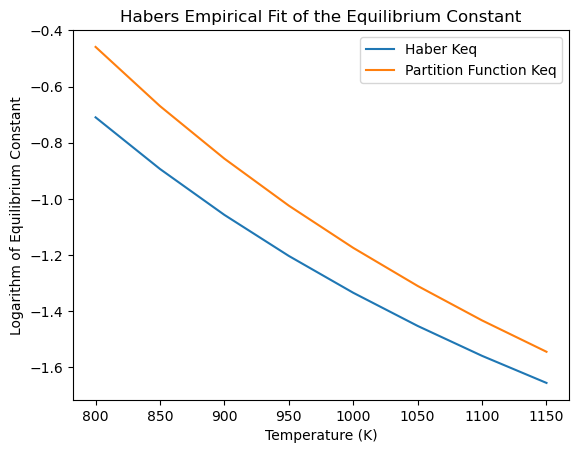

In [16]:
Keq_log_haber = (2.1+(2098/temps) - 2.5088*np.log10(temps) - 1.066e-4*temps +1.86e-7 * temps**2)+ np.log10(0.0821*temps)

fig, ax = plt.subplots()
ax.plot(temps, Keq_log_haber, label= 'Haber Keq')
ax.plot(temps, Keq_log, label= 'Partition Function Keq')
ax.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Logarithm of Equilibrium Constant')
plt.title('Habers Empirical Fit of the Equilibrium Constant')
plt.show()

# plt.plot(temps, Keq_log)
# plt.xlabel('Temperature (K)')
# plt.ylabel('Logarithm of Equilibrium Constant')
# plt.title('Habers Empirical Fit of the Equilibrium Constant')
# plt.show()

**Problem 1e** My Keq is very wrong, but possible reasons that the partition function calculated equilibrium constants are not the same as Haber's empirical fit are that the vibrations are modeled as a harmonic oscillator which is not a perfect model for bond vibrations and also the energies for the electronic partition function were calculated using approximations so they are not exact even though the level of theory was very good. 

**Problem 2a**

In [17]:
from openmm.app import *
from openmm import *
from openmm.unit import *

In [18]:
pdb = PDBFile('waterbox.pdb')
ff = ForceField('tip3p.xml')
system = ff.createSystem(pdb.topology, 
                         nonbondedMethod=PME, 
                         nonbondedCutoff=0.9*nanometer, rigidWater=True) #creates interactions
integ = LangevinIntegrator(300*kelvin, 1.0/picosecond, 2*femtosecond) #give integrator timestep*unit variable
baro = MonteCarloBarostat(1.0*atmosphere, 300*kelvin) #pressure, temp, attempt freq
system.addForce(baro)
simul = Simulation(pdb.topology, system, integ)
simul.context.setPositions(pdb.positions)
simul.context.getState(getEnergy=True).getPotentialEnergy()
simul.reporters.append(DCDReporter('waterbox-dynamics.dcd', 100))
import sys
simul.reporters.append(StateDataReporter(sys.stdout, 1000, step=True, totalEnergy=True, temperature=True,
                  density=True, progress=True, speed=True, separator='\t', totalSteps=50000))
simul.step(50000)

#"Progress (%)"	"Step"	"Total Energy (kJ/mole)"	"Temperature (K)"	"Density (g/mL)"	"Speed (ns/day)"
2.0%	1000	-31077.107474474695	269.18382955900734	1.0135248324066082	0
4.0%	2000	-30116.10501089784	281.12030596592155	0.9953069598574598	62
6.0%	3000	-29237.458265853333	295.13668303597706	0.9922742003099787	62.3
8.0%	4000	-28988.94578127189	306.14688456968037	0.9848009171956307	62.3
10.0%	5000	-28819.6280957641	304.403787308203	0.9729884639983893	63.3
12.0%	6000	-29141.272059201434	301.7881662616308	0.9797380666663145	62.6
14.0%	7000	-28621.32065779904	305.4202908803171	0.9747688837770417	62.4
16.0%	8000	-28737.61067741971	291.60068269212843	0.9783646466558158	62.8
18.0%	9000	-29406.119885870965	288.79673516372924	0.9951358559288239	62.8
20.0%	10000	-29174.80328826289	299.1714449664163	0.971248857959913	63.2
22.0%	11000	-29180.681630123705	300.5223114681388	0.9971371891573741	62.7
24.0%	12000	-29007.132189109845	303.08651880065025	0.9798162521818051	62.3
26.0%	13000	-29140.883732888433	

**Problem 2b**

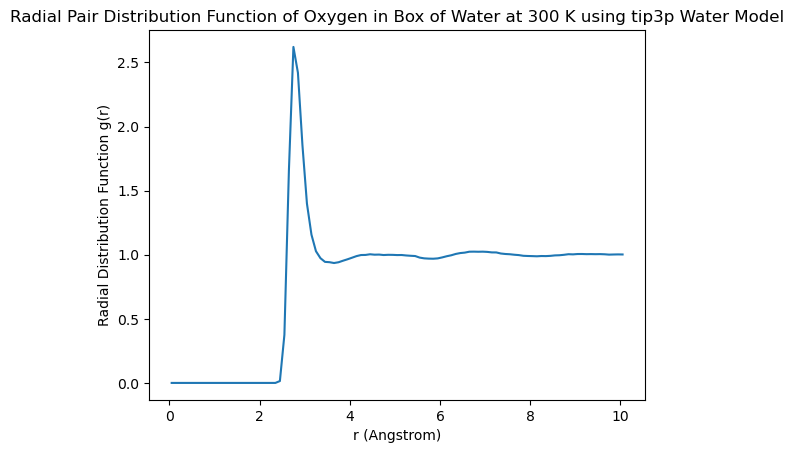

In [19]:
data = np.loadtxt('rdf_graph_300K_tip3p.dat')
x = data[:,0]
y = data[:,1]
integral = data[:,2]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.title('Radial Pair Distribution Function of Oxygen in Box of Water at 300 K using tip3p Water Model')
plt.show()

**Problem 2c**

Radial distribution function of water at 370K with tip3p parameters. It looks like the convergence is more smooth at 370 K than it is at 300 K. 

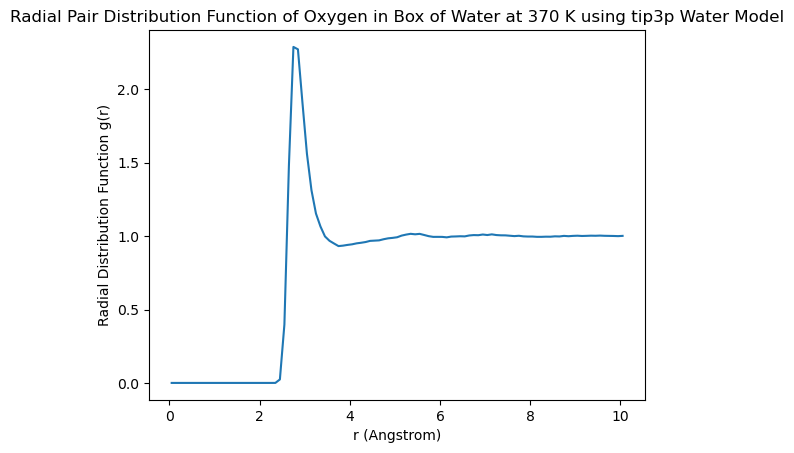

In [20]:
data = np.loadtxt('rdf_graph_370K_tip3p.dat')
x = data[:,0]
y = data[:,1]
integral = data[:,2]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.title('Radial Pair Distribution Function of Oxygen in Box of Water at 370 K using tip3p Water Model')
plt.show()

In [21]:
pdb = PDBFile('waterbox.pdb')
ff = ForceField('tip3p.xml')
system = ff.createSystem(pdb.topology, 
                         nonbondedMethod=PME, 
                         nonbondedCutoff=0.9*nanometer, rigidWater=True) #creates interactions
integ = LangevinIntegrator(370*kelvin, 1.0/picosecond, 2*femtosecond) #give integrator timestep*unit variable
baro = MonteCarloBarostat(1.0*atmosphere, 370*kelvin) #pressure, temp, attempt freq
system.addForce(baro)
simul = Simulation(pdb.topology, system, integ)
simul.context.setPositions(pdb.positions)
simul.context.getState(getEnergy=True).getPotentialEnergy()
simul.reporters.append(DCDReporter('waterbox-dynamics-370.dcd', 100))
import sys
simul.reporters.append(StateDataReporter(sys.stdout, 1000, step=True, totalEnergy=True, temperature=True,
                  density=True, progress=True, speed=True, separator='\t', totalSteps=50000))
simul.step(50000)

#"Progress (%)"	"Step"	"Total Energy (kJ/mole)"	"Temperature (K)"	"Density (g/mL)"	"Speed (ns/day)"
2.0%	1000	-27118.864342271743	324.1588824279514	0.9451147724390635	0
4.0%	2000	-24756.17447390032	356.7163084691377	0.9025331223188314	61.4
6.0%	3000	-23841.995206099717	372.83918307147025	0.8961869624146269	61.6
8.0%	4000	-24108.324335430952	366.83108276466686	0.9028235951515915	62.6
10.0%	5000	-23931.700035518897	362.66111449673326	0.9039930788256616	63.5
12.0%	6000	-24115.823888878374	360.21800710570795	0.9036681191196415	64
14.0%	7000	-24011.15592798217	367.80539565223216	0.8967172815212227	64.2
16.0%	8000	-23688.15596339616	383.09423959420167	0.8924589468952512	64.5
18.0%	9000	-23926.419459030465	371.0338409254555	0.9179053635808317	64.6
20.0%	10000	-24095.060154662875	376.6183669937901	0.9305443265561231	64.8
22.0%	11000	-24578.43800009108	364.0273850711908	0.9227529061997932	64.9
24.0%	12000	-24155.400631976852	371.50315198688236	0.9203330372712034	64.9
26.0%	13000	-24190.55894260

**Problem 2d**
The experimentally measured O-O radial distribution function at 300 K is 
provided as oo.als_bestfit.dat .  Plot your RDF result from part (a), compare to 
the experimental result, and note the differences.

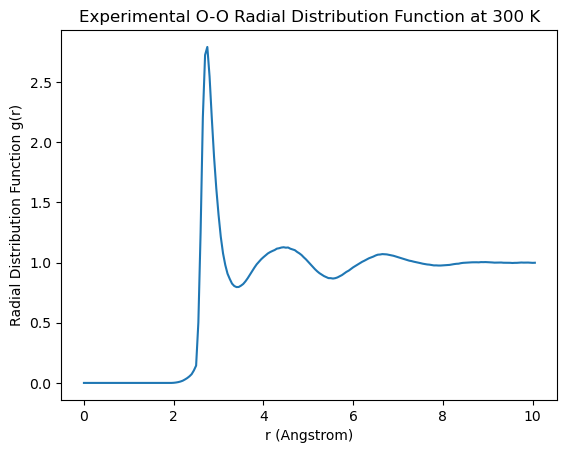

In [22]:
data = np.loadtxt('oo.als_bestfit.dat')
x = data[:,0]
y = data[:,1]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.title('Experimental O-O Radial Distribution Function at 300 K')
plt.show()

**Problem 2e**

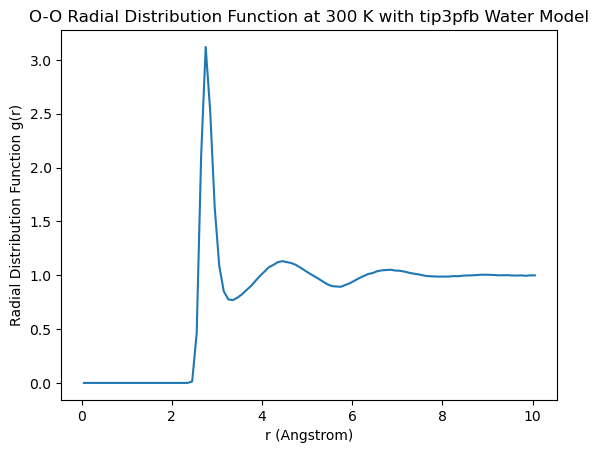

In [23]:
data = np.loadtxt('rdf_graph_300K_tip3pfb.dat')
x = data[:,0]
y = data[:,1]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.title('O-O Radial Distribution Function at 300 K with tip3pfb Water Model')
plt.show()

In [24]:
pdb = PDBFile('waterbox.pdb')
ff = ForceField('tip3pfb.xml')
system = ff.createSystem(pdb.topology, 
                         nonbondedMethod=PME, 
                         nonbondedCutoff=0.9*nanometer, rigidWater=True) #creates interactions
integ = LangevinIntegrator(300*kelvin, 1.0/picosecond, 2*femtosecond) #give integrator timestep*unit variable
baro = MonteCarloBarostat(1.0*atmosphere, 300*kelvin) #pressure, temp, attempt freq
system.addForce(baro)
simul = Simulation(pdb.topology, system, integ)
simul.context.setPositions(pdb.positions)
simul.context.getState(getEnergy=True).getPotentialEnergy()
simul.reporters.append(DCDReporter('waterbox-dynamics-300-tip3pfb.dcd', 100))
import sys
simul.reporters.append(StateDataReporter(sys.stdout, 1000, step=True, totalEnergy=True, temperature=True,
                  density=True, progress=True, speed=True, separator='\t', totalSteps=50000))
simul.step(50000)

#"Progress (%)"	"Step"	"Total Energy (kJ/mole)"	"Temperature (K)"	"Density (g/mL)"	"Speed (ns/day)"
2.0%	1000	-38205.76912771488	281.6886062111133	1.0016760974923578	0
4.0%	2000	-37591.55681045269	291.4475514513684	0.9852644903890386	66.3
6.0%	3000	-37335.56454864388	307.90205962787064	1.0095571652055886	65.5
8.0%	4000	-37285.409616501885	302.2358186694056	0.9963465612763293	64.4
10.0%	5000	-37334.783810737725	295.7731206130167	0.9863273758008906	63.9
12.0%	6000	-37385.44667582866	293.8672716268043	0.9911096140725468	63
14.0%	7000	-37330.21533212637	297.329634692187	0.9975907191916783	63
16.0%	8000	-36926.0231644108	300.75896823589125	0.9810504826752052	62.7
18.0%	9000	-37137.20022325572	296.63049884091635	1.0000144587411288	62.9
20.0%	10000	-37368.06385921332	292.71472049429417	0.9880800072076451	62.8
22.0%	11000	-37210.58236478246	296.3097937658124	0.9899548428101904	63
24.0%	12000	-37165.7748529733	305.58545166883954	0.9777256052518936	63.1
26.0%	13000	-37330.24242840796	304.4256098

**Problem 2f**

Save the TIP3P-FB RDF to a file, and numerically integrate the function 
$ {4}{\pi}{r^2}{g(r)}{dr} $ out to the first trough to estimate the coordination number. You can 
do this easily by checking the “Display Int(g(r))” box, and noting the Int(g(r)) 
value that appears at the same r-coordinate as the first trough in g(r). 

<img src="waterbox-rdf-tip3pfb-300K.png" alt="Radial Pair Distribution Function of Oxygen in Water at 300 K with tip3pfb parameters" width="500"/>

<img src="waterbox-integral-tip3pfb-300K.png" alt="Integral of Radial Pair Distribution Function of Oxygen in Water at 300 K with tip3pfb parameters" width="500"/>